<font size=5><b>Определение потенциально популярного продукта.</b></font><br>

<font size=3>На основе исторических данных из открытых источников нужно выявить закономерности, определяющие успешности игры.<br>
    
Имеются данные до 2016 года. На их основе нужно построить рекламную кампанию на 2017 год.<br>
    
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</font>

<font size=4><b>План выполнения проекта.</b></font><br>
<font size=3>
1. Открыть файл с данными и изучить общую информацию.<br>  
2. Подготовить данные.<br>  
3. Провести исследовательский анализ.<br>  
4. Составить портрет пользователя каждого региона.<br>  
5. Проверить гипотезы.<br>  
6. Написать общий вывод.<br>  
</font>


<font size=4><b>Описание данных.</b><font><br>
<font size=3>
- Name — название игры<br>
- Platform — платформа<br>
- Year_of_Release — год выпуска<br>
- Genre — жанр игры<br>
- NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
- EU_sales — продажи в Европе (миллионы проданных копий)<br>
- JP_sales — продажи в Японии (миллионы проданных копий)<br>
- Other_sales — продажи в других странах (миллионы проданных копий)<br>
- Critic_Score — оценка критиков (максимум 100)<br>
- User_Score — оценка пользователей (максимум 10)<br>
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
</font>

### Изучение общей информации о данных


In [1]:
#импорт необходимых бибилотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#общая информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Вывод</b>  
На первый взгляд, видно что, нужно переименовать столбцы, изменить типы данных, поработать с пропусками.
Считаю, что этого будет достаточно. Переходим к следующему разделу.

### Подготовка данных  
Судя по данным выше, оказалось, что нужно привести названия столбцов к нижнему регистру, изменить типы данных в столбцах и разобраться с пропусками значений. Начнем с переименования.  

<b>Проверка на дубликаты</b>

In [4]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


<b>Переименование столбцов</b>

In [5]:
#приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Изменение типов данных.** 
    
'critic_score' - int, потому что оценки целые числа.  
'user_score' - float, потому что оценки дробные числа.  
В остальных столбцах все корректно.  

In [6]:
try:
    data['critic_score'] = data['critic_score'].astype('int')
except:
    print('Не получилось изменить тип данных')

Не получилось изменить тип данных


Тип данных не изменен, так как в столбце есть NaN. По умолчанию, pandas их считает как float. Заполним пропуски -1 (будет нашим маркером), так как рейтинг может быть нулевой и пропуски перепутаются с этими значениями, а в дальнейшем заполним значениями, которые будут нужны. Изменим тип данных.

In [7]:
data['critic_score'] = data['critic_score'].fillna(-1)
print('Количество пропусков:', data['critic_score'].isna().sum())
print()
data['critic_score'] = data['critic_score'].astype('int')
print('Тип данных:', data['critic_score'].dtypes)

Количество пропусков: 0

Тип данных: int32


С критиками разобрались, двигаемся дальше. Со следующим столбцом поступим точно также.

In [8]:
try:
    data['user_score'] = data['user_score'].astype('float')
except:
    print('Не получилось изменить тип данных')

Не получилось изменить тип данных


Если не пользоваться блоком try/except, то питон выдает ошибку из-за того, что в столбце есть строковое значение "tbd". 

<q><i>TBD - абревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.</i></q>  

Получается пользователь не дал никакую оценку, поэтому заменим данные значения на NaN и проверим на уникальные значения. Изменим тип данных на float.

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
print('Уникальные значения:', data['user_score'].unique())
print()
data['user_score'] = data['user_score'].astype('float')
print('Тип данных:', data['user_score'].dtypes)

Уникальные значения: ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Тип данных: float64


Все получилось. Переходим к следующим действиям.  

<b>Заполнение пропусков</b>  
Освежим память и посмотрим куда закрались пропуски.

In [10]:
print('Количество пропусков в датасете:') 
data.isna().sum()

Количество пропусков в датасете:


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         9125
rating             6766
dtype: int64

Пропуски есть в 5 столбцах, но не забываем, что critical_score заполнили -1, поэтому его учитываем, так как с ним нужно поработать. В итоге, получается 6 столбцов с пропусками. Начнем их заполнять.  

Начнем с name.

In [11]:
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1,NaN,NaN


Нам повезло, что в этих строчках оказались пропуски в двух столбцах. Судя по данным это игры без названия выпущенные в 1993 году для платформы GEN. Жанр игр пропущен, нет оценок и рейтинга. Продажи почти нулевые.  
Считаю что эти строчки нужно удалить.

In [12]:
data = data.dropna(subset=['name'])

print('Количество пропусков:', data['name'].isna().sum())


Количество пропусков: 0


В столбце с годом релиза 269 пропусков. Игры выпускались в разные года, поэтому точно заполнить пропуски не получится (конечно, можно найти в интеренте, но здесь речь об анализе). В столбце всего 1,6% таких значений, считаю что, можно их просто исключить из данных и, заодно, изменим тип данных на int. 

In [13]:
display(data.loc[data['year_of_release'].isna() == True].sort_values(by = 'na_sales', ascending=False))

data = data.dropna(subset=['year_of_release'])

data['year_of_release'] = data['year_of_release'].astype('int')

print('Количество пропусков:', data['year_of_release'].isna().sum())
print()
print('Тип данных:', data['year_of_release'].dtypes)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,-1,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73,NaN,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,-1,NaN,NaN
10837,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,-1,NaN,E
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,-1,NaN,NaN
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,-1,NaN,NaN


Количество пропусков: 0

Тип данных: int32


Выше, пропуски в столбце critic_score заполнили -1. Посмотрим уникальные ззначения в столбце.

In [14]:
data['critic_score'].sort_values().unique()

array([-1, 13, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [15]:
display(data.loc[data['critic_score'] == -1].sort_values(by='na_sales', ascending=False).head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,-1,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,NaN


В столбце половина пропусков. Вероятнее всего, была ошибка в выгрузке данных, а некоторые игры просто не оценили. Поэтому оставим все как есть.  

В рейтинге 40% пропусков. Причина такая же как выше, нельзя удалять данные. Оставим все как есть.

In [16]:
display(data.loc[data['rating'].isna() == True].head())

data['rating'] = data['rating'].fillna('unknown')

print('Уникальные значения')
print(data['rating'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,NaN,NaN


Уникальные значения
['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


<b>Добавим столбец с суммарными продажами</b>

In [17]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,unknown,31.38


Сбросим индексы после удаления пропусков.

In [18]:
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


<b>Вывод</b>  

В данном разделе предобработал данные:  
- переименовали стобцы;  
- заполнили пропуски, которые возможно;  
- удалили не нужные данные;  
- добавили столбец с суммарными продажами.  

Всего удалили 271 строку - это 1,6% от общего количества.

### Исследовательский анализ данных

<b>Количество игр выпускаемых в разные годы</b>

In [19]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

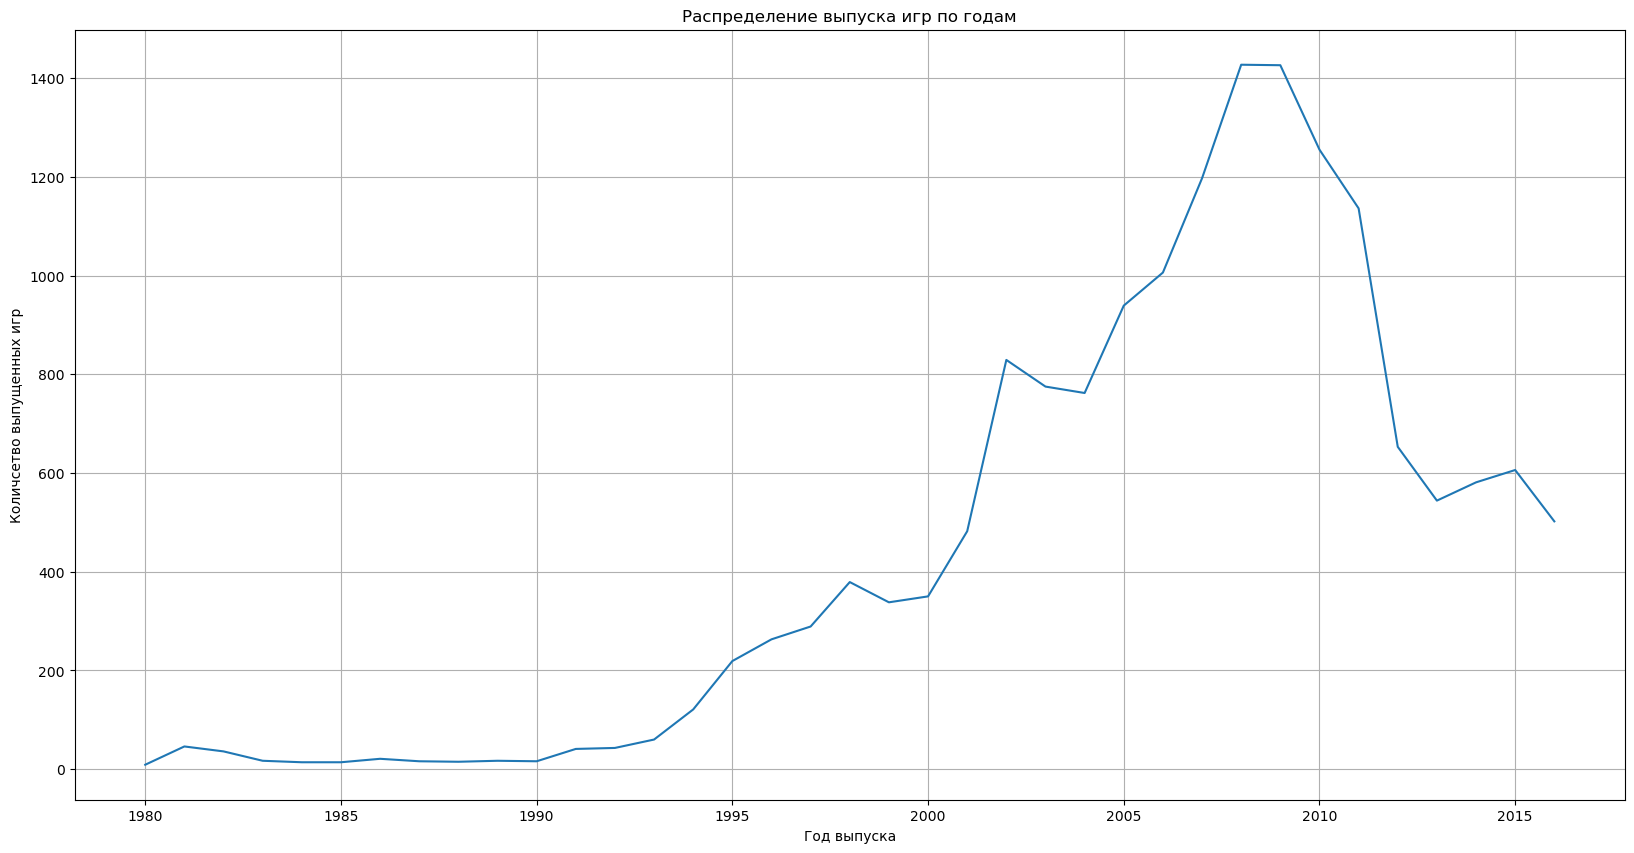

In [20]:
data.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(20, 10), title='Распределение выпуска игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количсетво выпущенных игр')
plt.show()

По данным видно, что индустрия видеоигр стремительно развивалась с 1991 года - количество росло. Пиковые значения приходятся на 2008 и 2009 года. С 2010 года началось небольшое уменьшение выпускаемых игр, а в 2012 вообще уменьшилось в 2 раза, по сравнению с 2011 годом и до 2016 года в среднем выпускали по 550 видеоигр. 

<b>Информация о платформах</b>

In [21]:
platform_sales = pd.pivot_table(data, index='platform', values='total_sales', aggfunc=np.sum)\
                   .sort_values(by='total_sales', ascending=False).reset_index()
display(platform_sales)
top_platforms = platform_sales.iloc[0:6]
display(top_platforms)
list_top_platforms = top_platforms['platform'].unique().tolist()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


Между PS и PS4 большой разрыв в продажах, поэтому будем рассматривать все, что выше PS4.

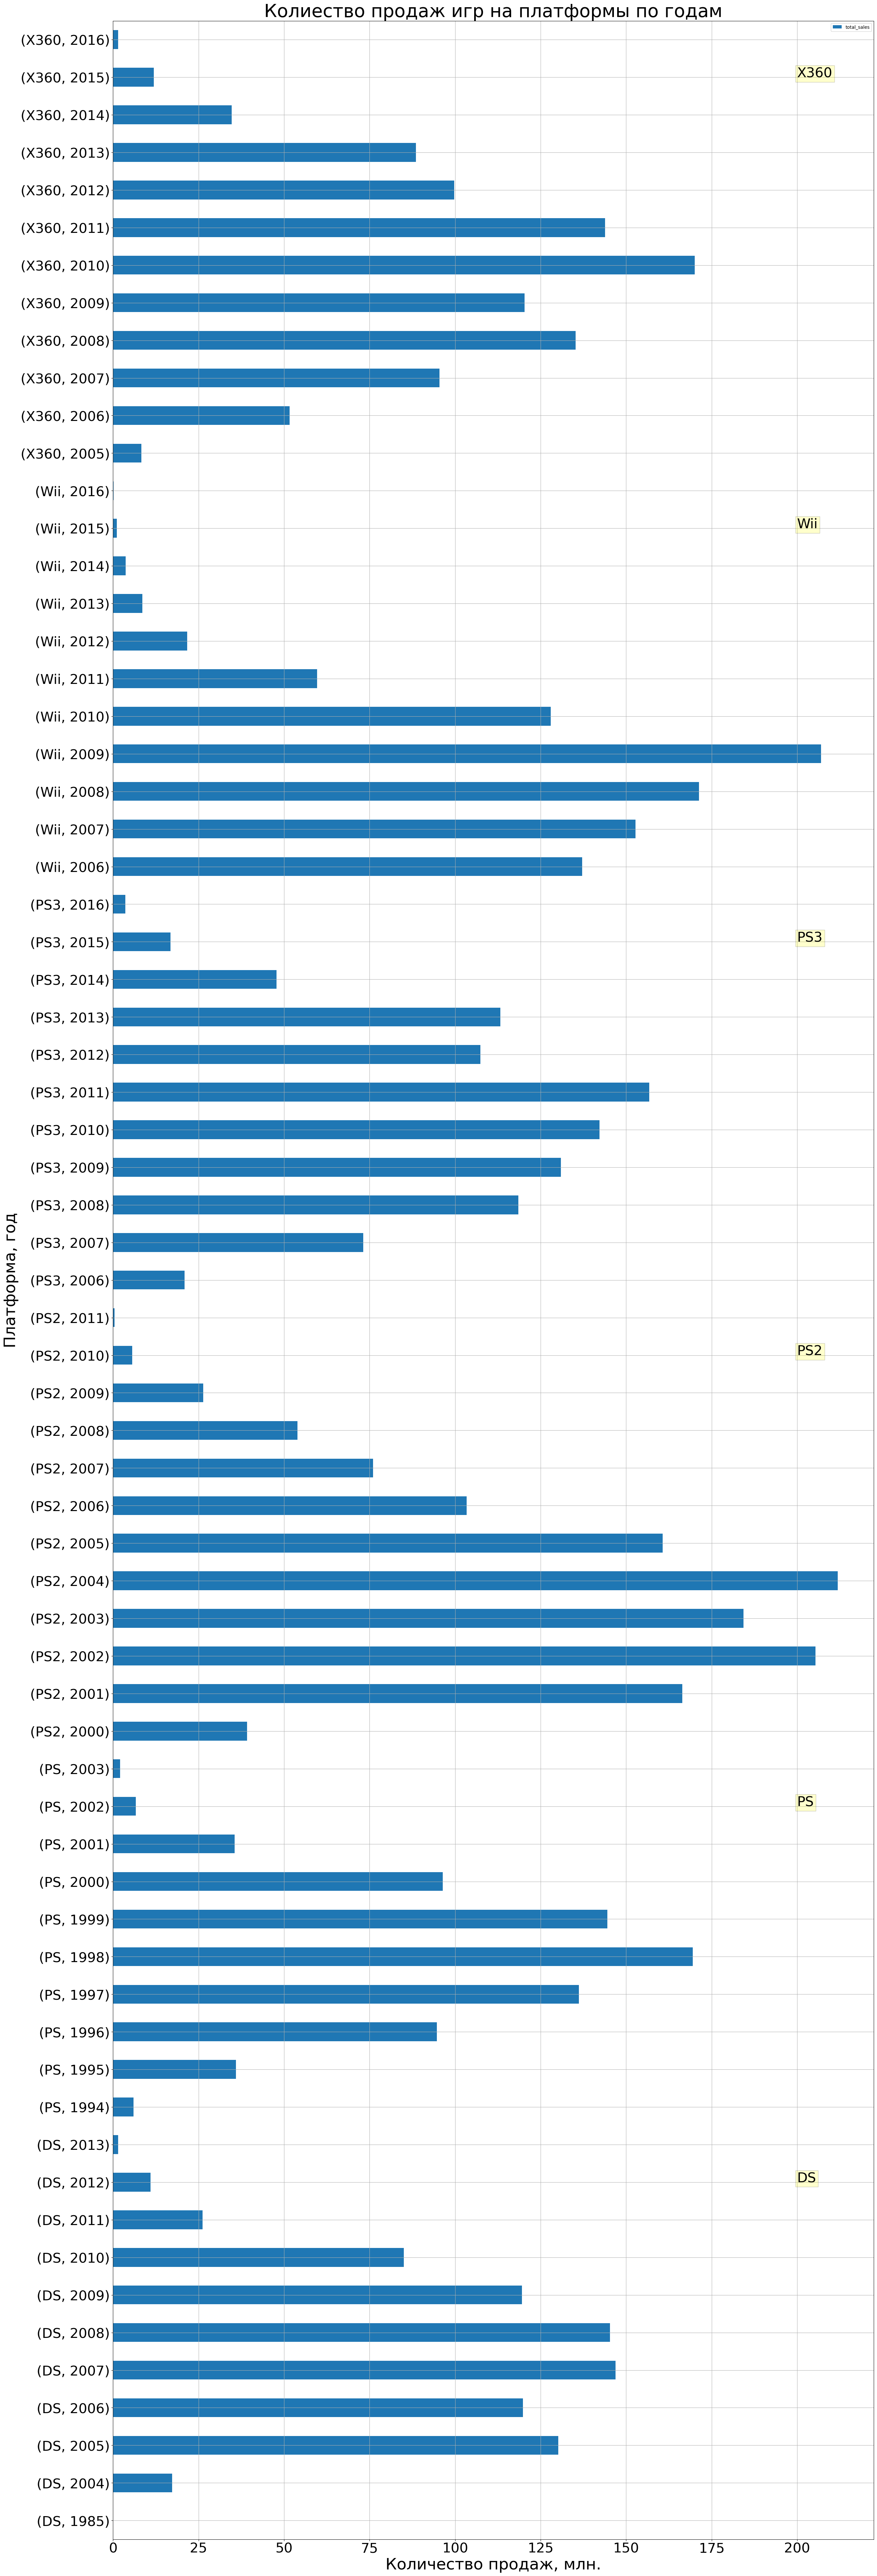

In [22]:
platform_pivot = (data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                      .query('platform in @list_top_platforms'))
#platform_pivot = platform_pivot[platform_pivot['total_sales'] != 0]


platform_pivot.plot(y='total_sales', kind='barh', figsize=(30,100), grid=True,)
plt.title('Колиество продаж игр на платформы по годам', fontsize=40)
plt.xlabel('Количество продаж, млн.', fontsize=35)
plt.xticks(fontsize=30)
plt.ylabel('Платформа, год', fontsize=35)
plt.yticks(fontsize=30)
plt.text(200, 65,'X360', fontsize=30, bbox={'facecolor':'yellow','alpha':0.2})
plt.text(200, 53,'Wii', fontsize=30, bbox={'facecolor':'yellow','alpha':0.2})
plt.text(200, 42,'PS3', fontsize=30, bbox={'facecolor':'yellow','alpha':0.2})
plt.text(200, 31,'PS2', fontsize=30, bbox={'facecolor':'yellow','alpha':0.2})
plt.text(200, 19,'PS', fontsize=30, bbox={'facecolor':'yellow','alpha':0.2})
plt.text(200, 9,'DS', fontsize=30, bbox={'facecolor':'yellow','alpha':0.2})
plt.show()




По графику видно, что средний срок жизни платформы 10 лет.

<b>Актуальный период</b>  

По данным выше видно, что в развитии игровой индустрии есть подъем, пик и спад. Рассмотрим данные после пиковых значений, так как информация до пика вряд ли поможет с прогнозом на 2017 год. Так же важно учитывать актуальность и срок существования платформы. Средний срок существования 10 лет. Чтобы оставить более менее актуальные и развивающиеся платформы возьмем период с 2013 года.

In [23]:
current_period = data[data['year_of_release'] >= 2013].reset_index(drop=True)
current_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,unknown,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,NaN,unknown,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,unknown,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,unknown,0.01


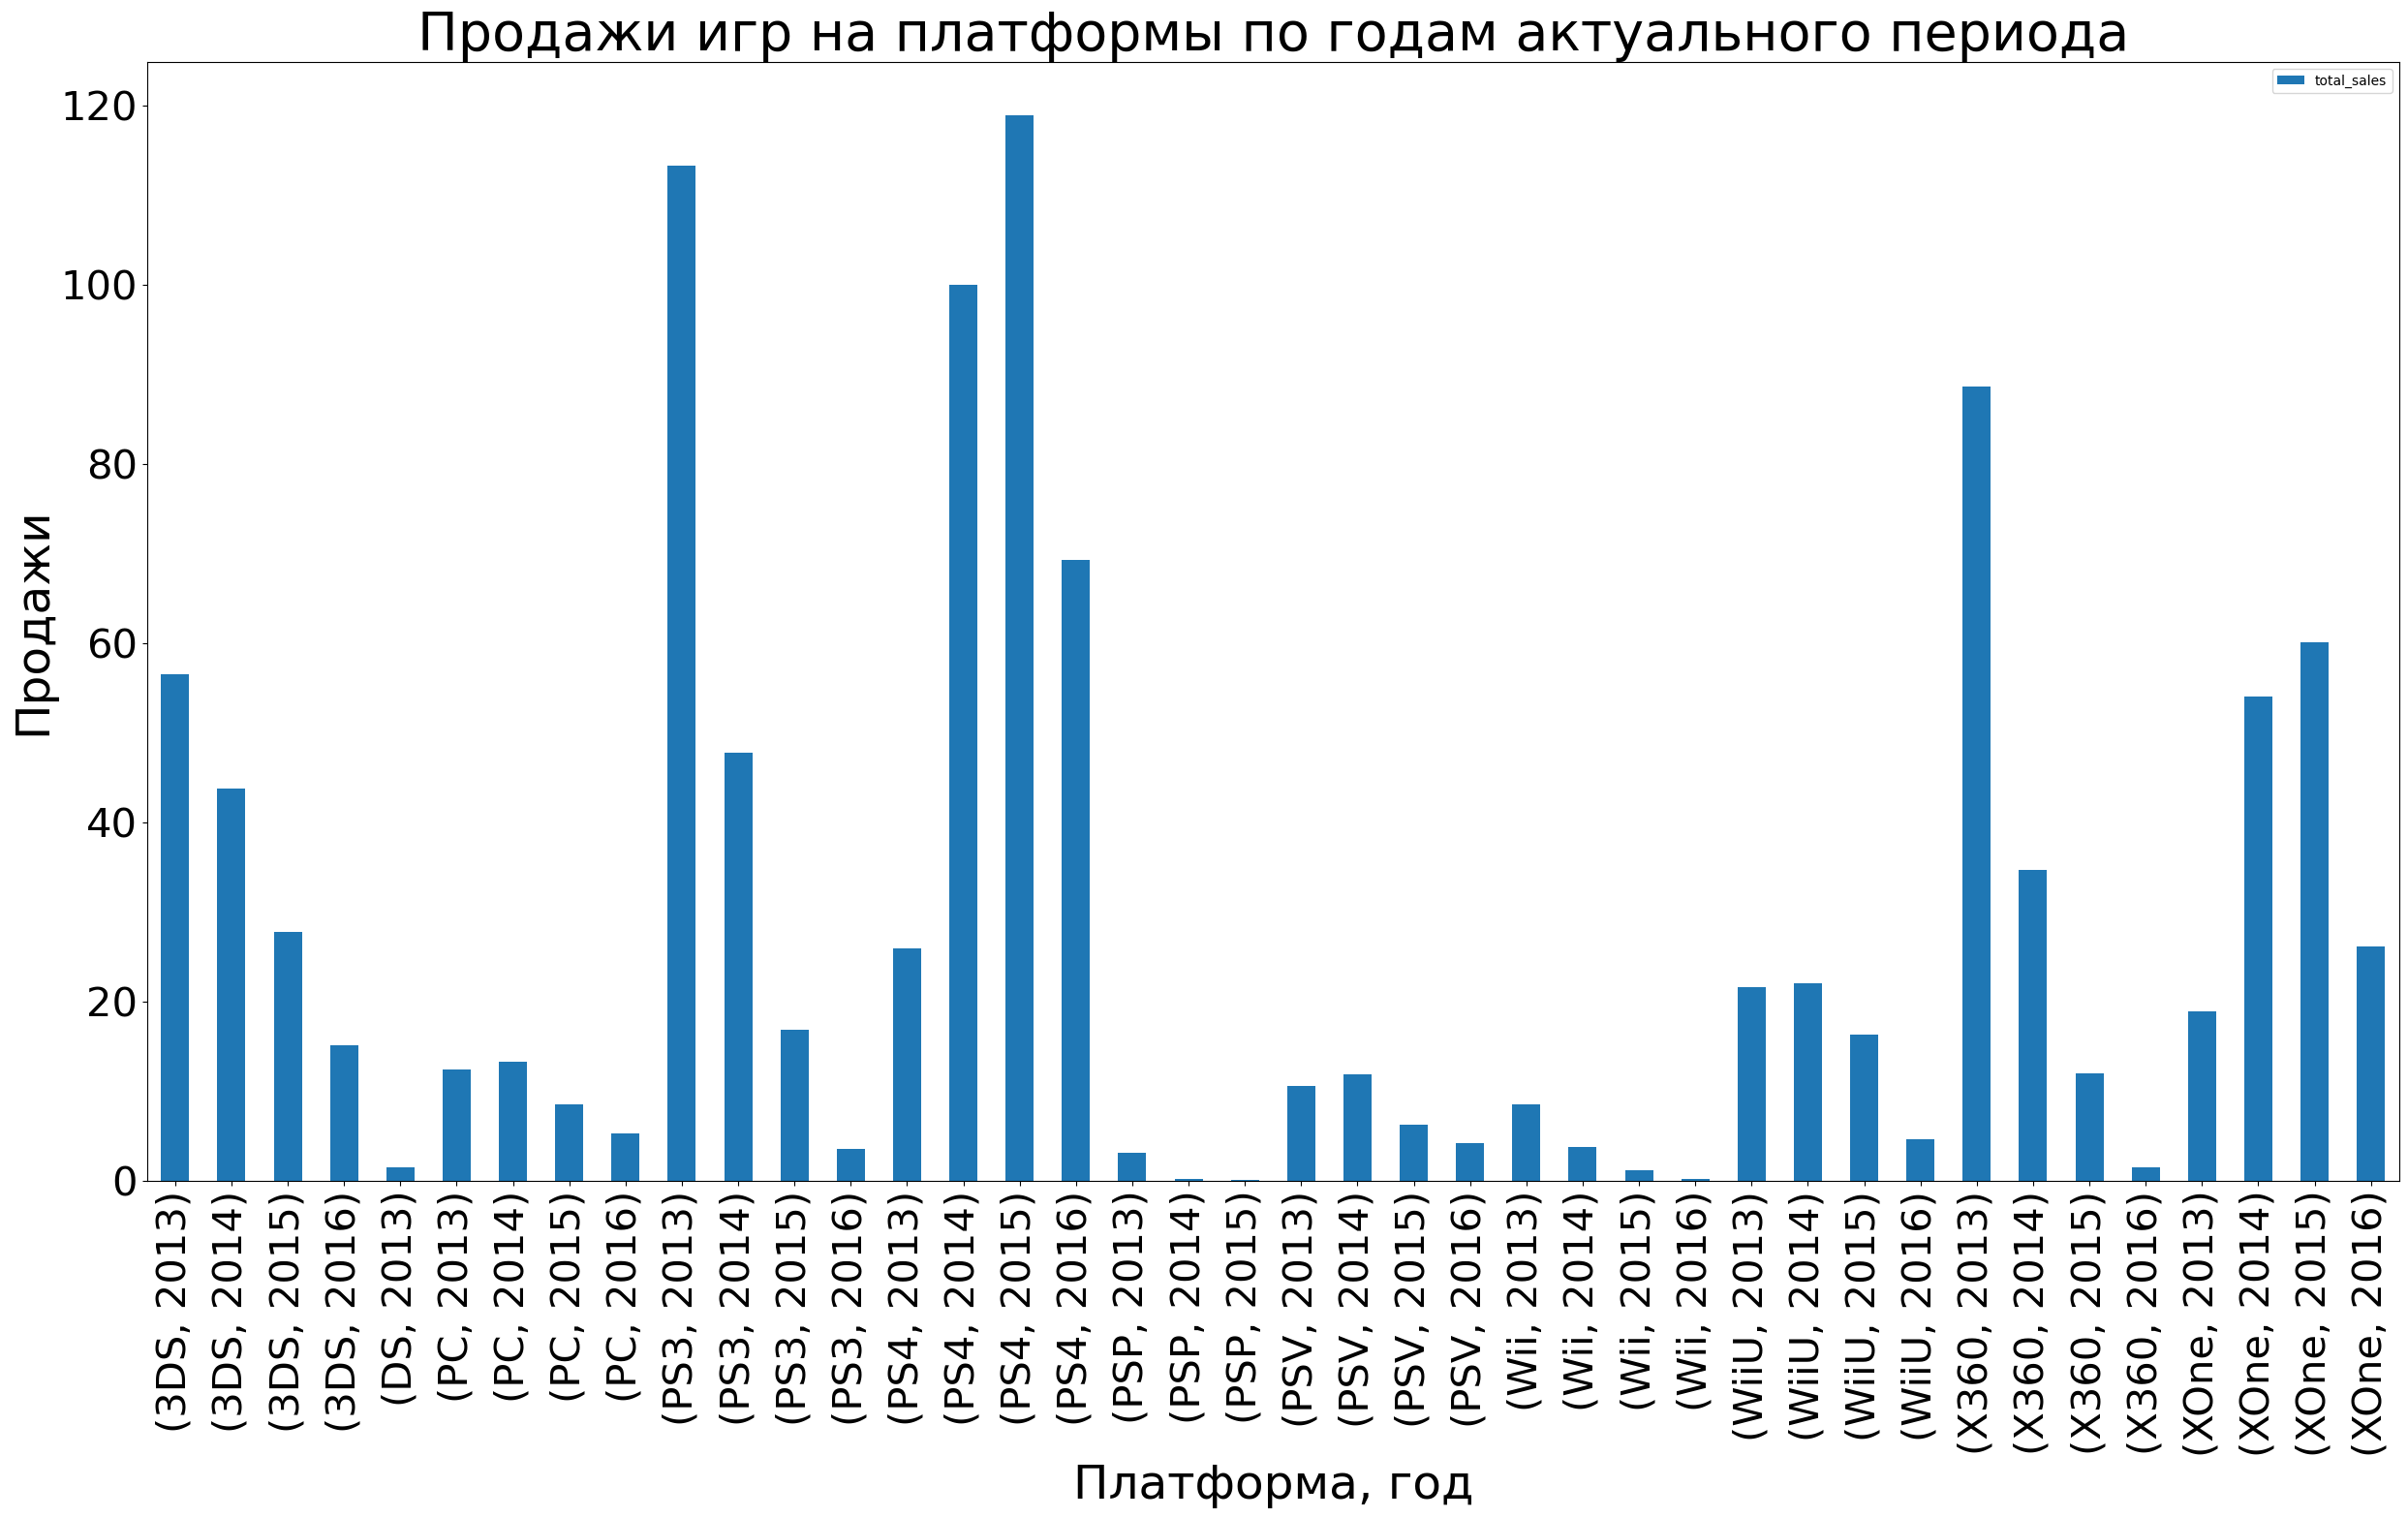

In [24]:
(
    current_period.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=sum)
                  .plot(kind='bar', figsize=(30, 15))
)
plt.title('Продажи игр на платформы по годам актуального периода', size=40)
plt.xlabel('Платформа, год', size=35)
plt.xticks(size=30)
plt.ylabel('Продажи', size=35)
plt.yticks(size=30)
plt.show()

На всех платформах в актуальном периоде наблюдается снижение продаж. В 2013 году лидирующей платформой была PS3, но к 2016 популярность сильно упала из-за релиза потомка - PS4, которая была абсолютным лидером по продажам за один год. Такая же ситуация наблюдается у X360 и XOne, так как X360 предшественник XOne. Но не смотря на все нюансы, самые актуальные платформы - PS4 и XOne.

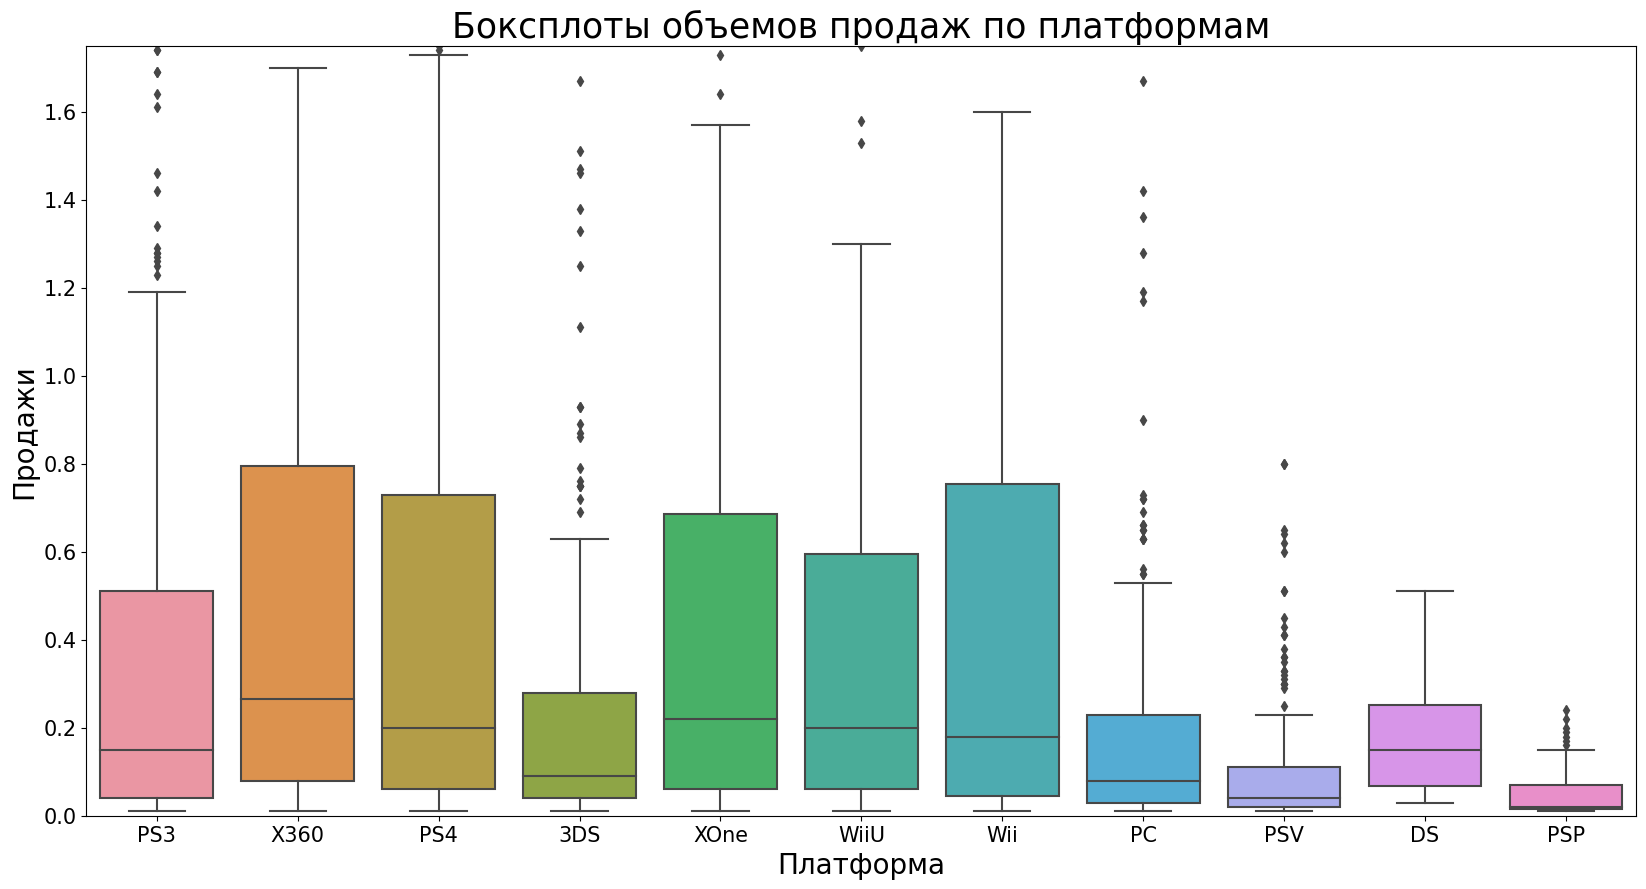

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=current_period, x='platform', y='total_sales')
plt.ylim(0, 1.75)
plt.title('Боксплоты объемов продаж по платформам', size=25)
plt.xlabel('Платформа', size=20)
plt.xticks(size=15)
plt.ylabel('Продажи', size=20)
plt.yticks(size=15)
plt.show()

На боксплотах все выглядит не так солнечно для PS4. Будем рассматривать данные без выбросов.  
В объеме продаж лучше всего дела обстоят у X360. Границы 2 и 3 квартилей и медиана находятся выше остальных платформ. максимальное значение слегка уступает PS4.

<b>Влияние оценки критиков и пользователей на продажи видеоигр на PS4</b>

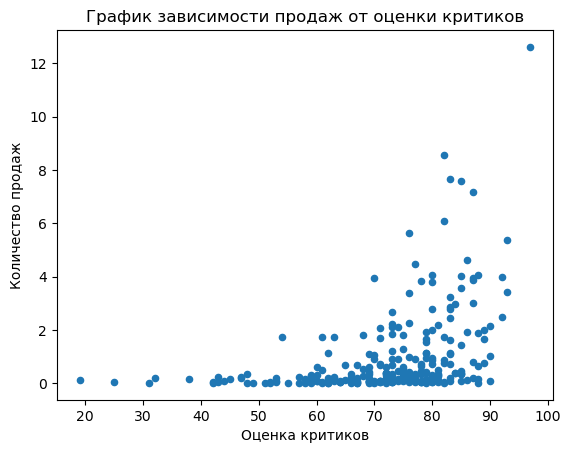

Коэффициент корреляции 0.40656790206178095


In [26]:
current_period[(current_period['platform'] == 'PS4') & (current_period['critic_score'] != -1)].plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('График зависимости продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()
print('Коэффициент корреляции', current_period[(current_period['platform'] == 'PS4') & (current_period['critic_score'] != -1)]['critic_score'].corr(current_period['total_sales']))

Наблюдается зависимость количества продаж от оценки критиков, чем лучше оценка критиков, тем больше продаж.

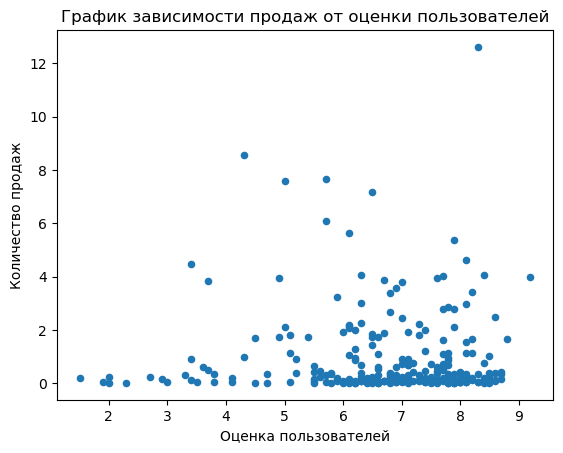

Коэффициент корреляции -0.031957110204556376


In [27]:
current_period[current_period['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter')
plt.title('График зависимости продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()
print('Коэффициент корреляции', current_period[current_period['platform'] == 'PS4']['user_score'].corr(current_period['total_sales']))

Зависимости от оценки пользователей не наблюдается. Оценки пользователей более субъективные.

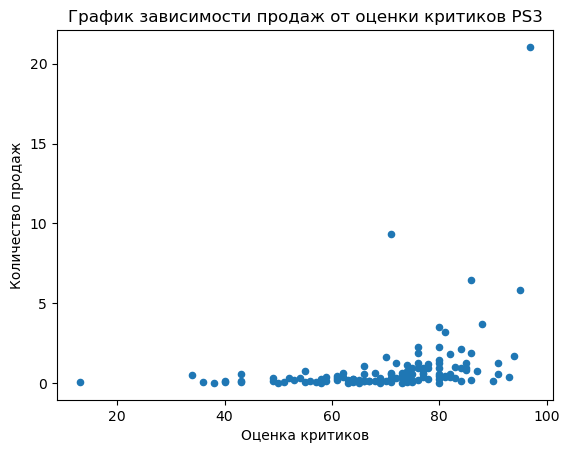

Коэффициент корреляции 0.3342853393371919



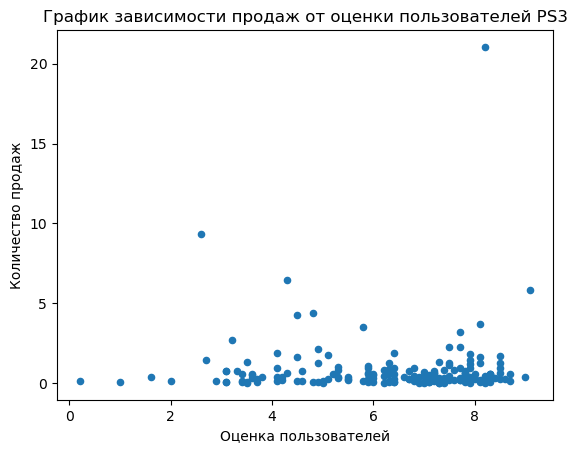

Коэффициент корреляции 0.0023944027357566925


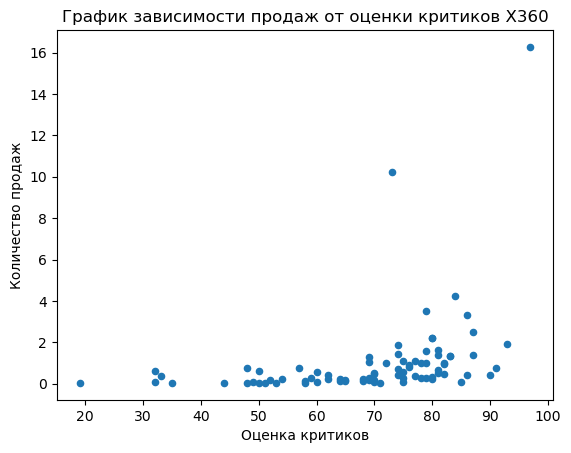

Коэффициент корреляции 0.3503445460228664



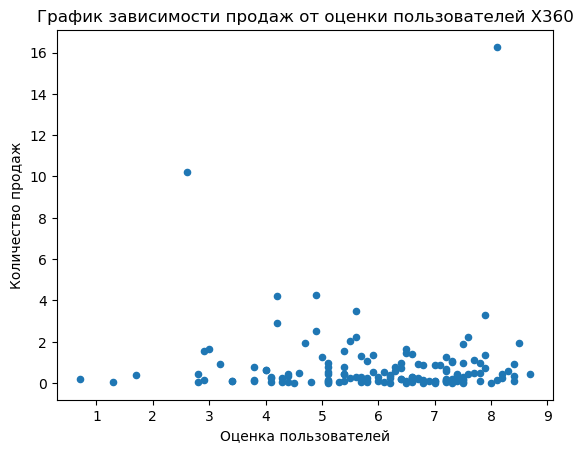

Коэффициент корреляции -0.011742185147181342


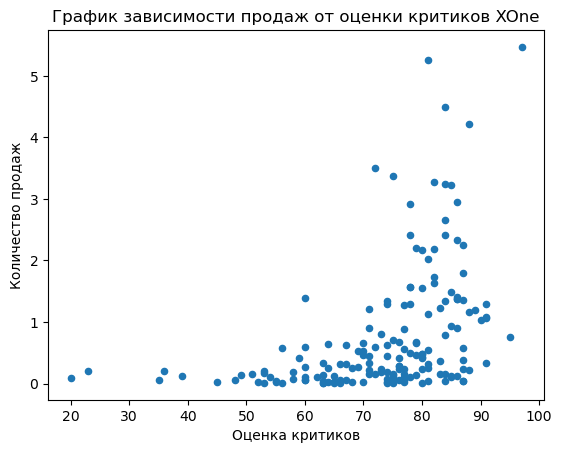

Коэффициент корреляции 0.4169983280084017



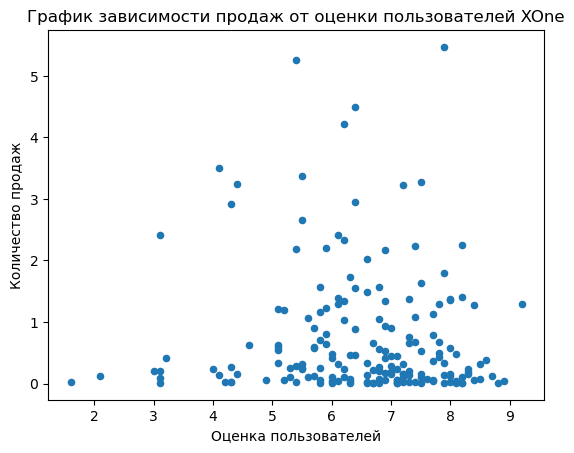

Коэффициент корреляции -0.06892505328279414


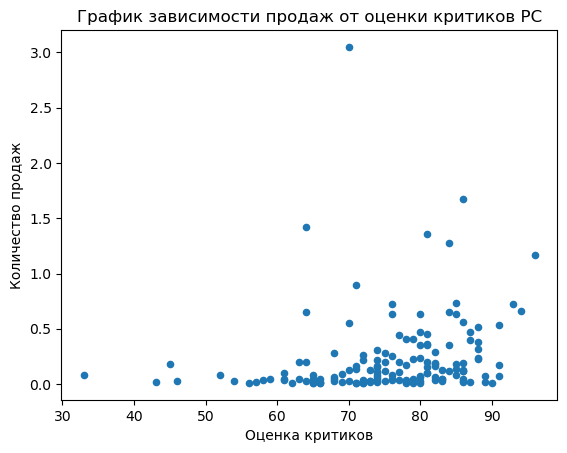

Коэффициент корреляции 0.19603028294369382



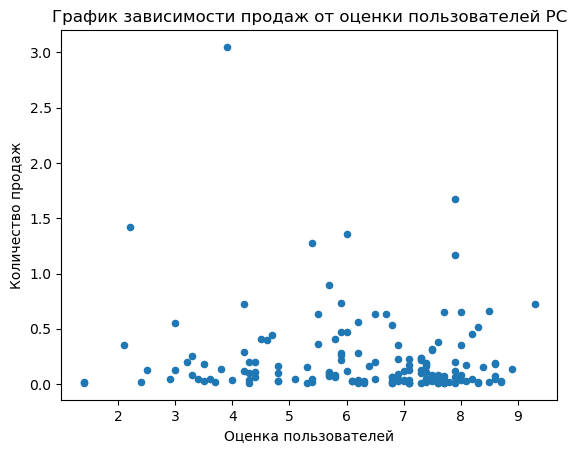

Коэффициент корреляции -0.0938418695247674


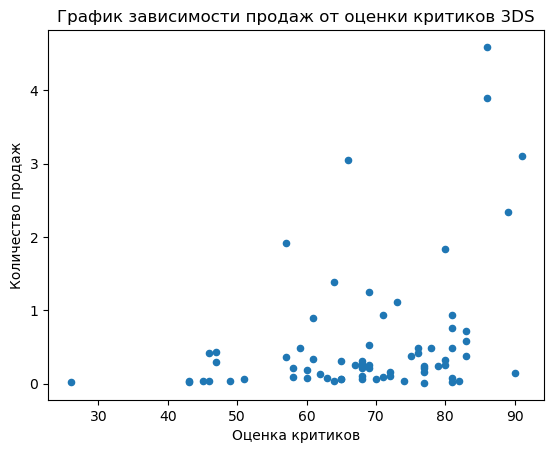

Коэффициент корреляции 0.3570566142288103



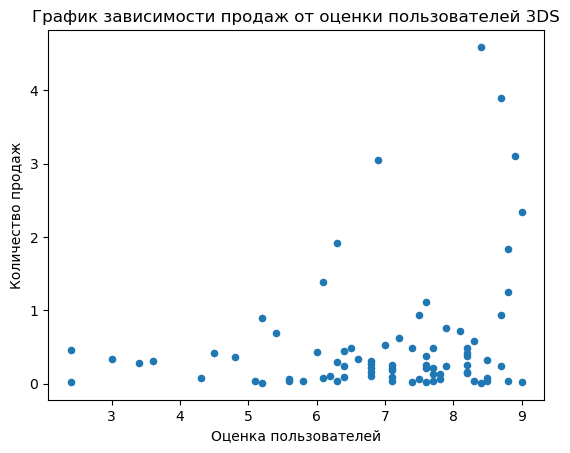

Коэффициент корреляции 0.24150411773563016


In [28]:
list_platform = ['PS3', 'X360', 'XOne', 'PC', '3DS']

for platform in list_platform:
    current_period[(current_period['platform'] == platform) & (current_period['critic_score'] != -1)]\
                    .plot(x='critic_score', y='total_sales', kind='scatter')
    plt.title('График зависимости продаж от оценки критиков ' + platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Количество продаж')
    plt.show()
    print('Коэффициент корреляции', current_period[(current_period['platform'] == platform) & (current_period['critic_score'] != -1)]['critic_score']
          .corr(current_period['total_sales']))
    print()
    current_period[current_period['platform'] == platform].plot(x='user_score', y='total_sales', kind='scatter')
    plt.title('График зависимости продаж от оценки пользователей ' + platform)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Количество продаж')
    plt.show()
    print('Коэффициент корреляции', current_period[current_period['platform'] == platform]['user_score']
          .corr(current_period['total_sales']))

По диаграммам рассеяния четко видна зависимость продаж игр на платформы от оценки критиков. Напротив, зависимости продаж на платформы от оценки пользователей нет, за исключением 3DS, здесь небольшая зависимость прослеживается.

In [29]:
(
    current_period.pivot_table(index='genre', values='total_sales', aggfunc=sum)
               .sort_values(ascending=False, by='total_sales')
)


,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


По общим продажам лидируют Action, Shooter, Sports, Role-Playing. Хуже всего - Puzzle, Strategy.

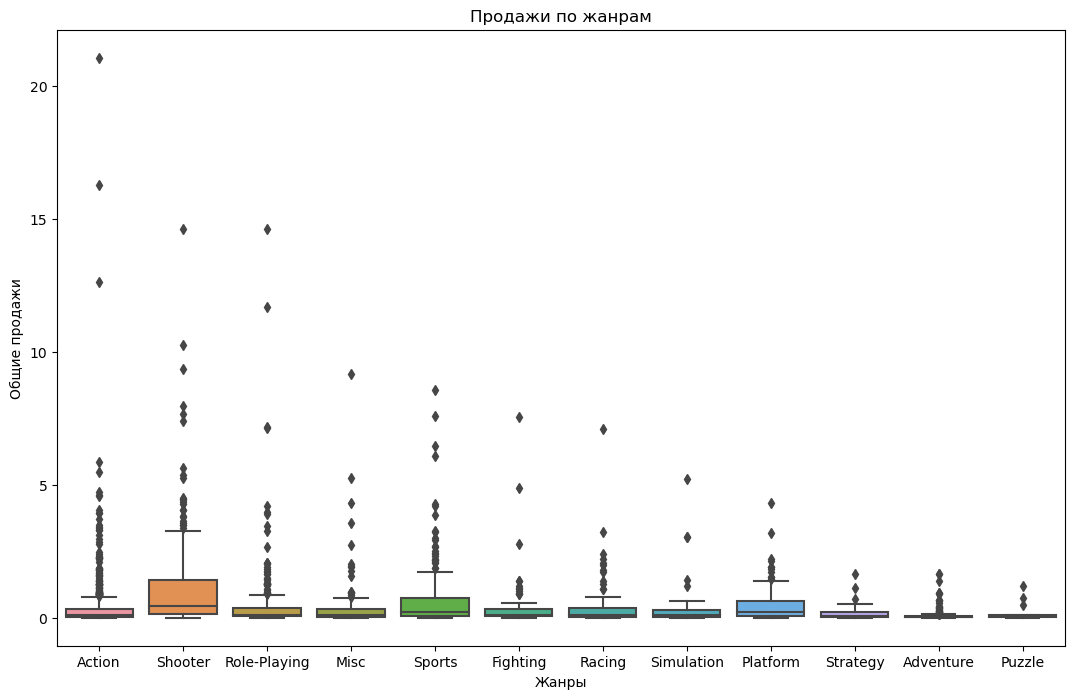

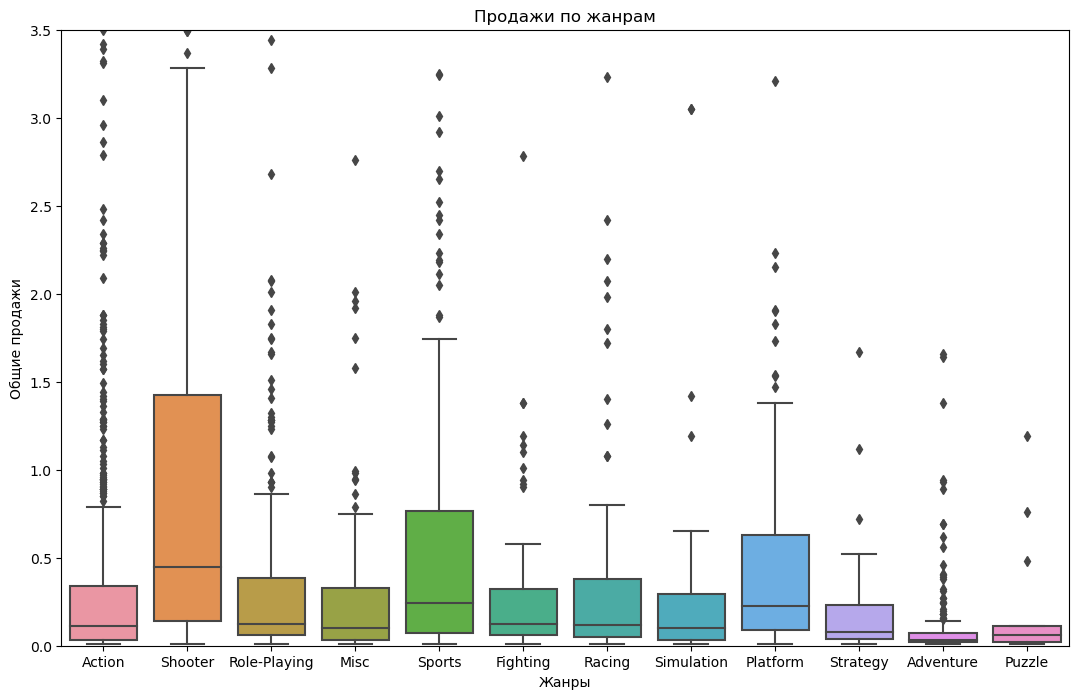

In [30]:
data_temp, y = current_period.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

Таким образом у нас самый прибыльный жанр Шутер.<br>В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.

<b>Вывод</b>  
Игровая индустрия стремительно развивалась. Количество выпускаемых игр росло. Пиковые значения были в 2008 и 2009 годах. За весь период больше всего продаж было на PS2, X360, PS3, Wii, DS, PS. Средняя жизнь платформы - 10 лет. Исходя из этого был выбран актуальный период - 2013-2016 года. В этот период самыми популярными платформами были PS4, PS3, X360, XOne. Самой популярной была PS4. Продажи приемущественно зависят от оценок критиков, а от оценок пользователей не зависят. Самыми популярными жанрами являются Action, Shooter, Sports. Самыми непопулярными - Puzzle, Strategy.

### Портрет пользователей регионов

<b>Топ 5 платформ по регионами</b>

In [31]:
na = current_period.pivot_table(index='platform', values='na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False).reset_index()
na_tail_top = na.iloc[5: len(na)]
na.loc[5] = ['Othres', na_tail_top['na_sales'].sum().round(2)]
na_top5 = na.iloc[0:6]

eu = current_period.pivot_table(index='platform', values='eu_sales', aggfunc=sum).sort_values(by='eu_sales', ascending=False).reset_index()
eu_tail_top = eu.iloc[5: len(eu)]
eu.loc[5] = ['Othres', eu_tail_top['eu_sales'].sum().round(2)]
eu_top5 = eu.iloc[0:6]

jp = current_period.pivot_table(index='platform', values='jp_sales', aggfunc=sum).sort_values(by='jp_sales', ascending=False).reset_index()
jp_tail_top = jp.iloc[5: len(eu)]
jp.loc[5] = ['Othres', jp_tail_top['jp_sales'].sum().round(2)]
jp_top5 = jp.iloc[0:6]

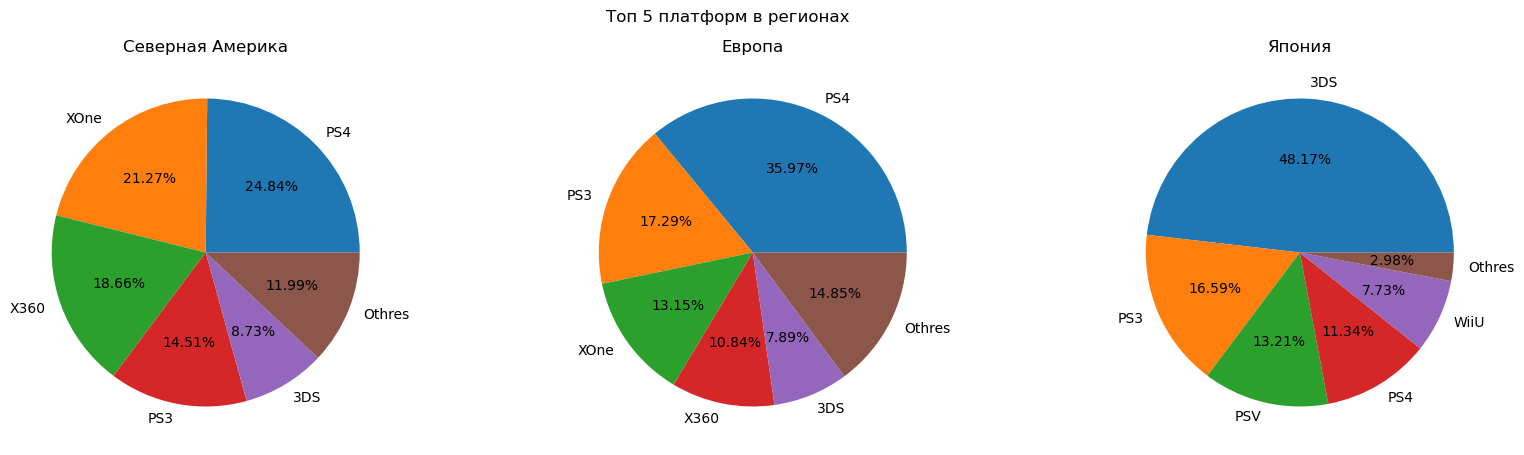

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

fig.suptitle('Топ 5 платформ в регионах')

ax[0].pie(na_top5['na_sales'], labels=na_top5['platform'],  autopct='%1.2f%%')
ax[0].set_title('Северная Америка')
ax[1].pie(eu_top5['eu_sales'], labels=eu_top5['platform'],  autopct='%1.2f%%')
ax[1].set_title('Европа')
ax[2].pie(jp_top5['jp_sales'], labels=jp_top5['platform'],  autopct='%1.2f%%')
ax[2].set_title('Япония')

plt.show()

В Северной Америке популярны - XOne, PS4, X360.  
В Европе - PS4 и PS3.  
В Японии - 3DS.

<b>Топ 5 жанров по регионам</b>

In [33]:
na_genre = current_period.pivot_table(index='genre', values='na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False).reset_index()
na_genre_tail_top = na_genre.iloc[5: len(na_genre)]
na_genre.loc[5] = ['Othres', na_genre_tail_top['na_sales'].sum().round(2)]
na_genre_top5 = na_genre.iloc[0:6]

eu_genre = current_period.pivot_table(index='genre', values='eu_sales', aggfunc=sum).sort_values(by='eu_sales', ascending=False).reset_index()
eu_genre_tail_top = eu_genre.iloc[5: len(eu_genre)]
eu_genre.loc[5] = ['Othres', eu_genre_tail_top['eu_sales'].sum().round(2)]
eu_genre_top5 = eu_genre.iloc[0:6]

jp_genre = current_period.pivot_table(index='genre', values='jp_sales', aggfunc=sum).sort_values(by='jp_sales', ascending=False).reset_index()
jp_genre_tail_top = jp_genre.iloc[5: len(jp_genre)]
jp_genre.loc[5] = ['Othres', jp_genre_tail_top['jp_sales'].sum().round(2)]
jp_genre_top5 = jp_genre.iloc[0:6]

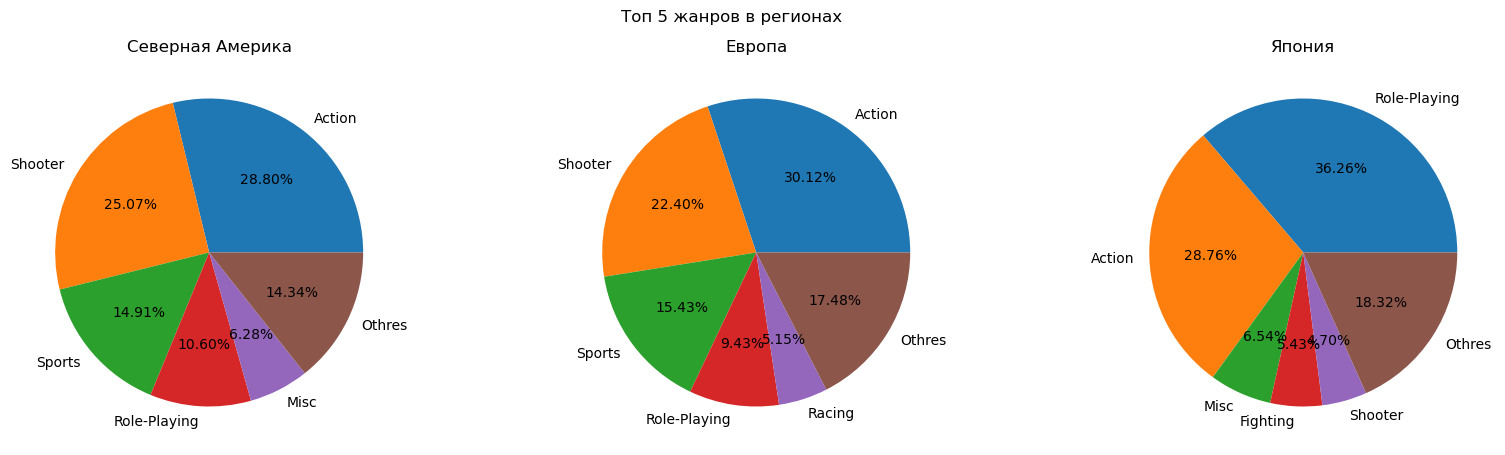

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

fig.suptitle('Топ 5 жанров в регионах')

ax[0].pie(na_genre_top5['na_sales'], labels=na_genre_top5['genre'],  autopct='%1.2f%%')
ax[0].set_title('Северная Америка')
ax[1].pie(eu_genre_top5['eu_sales'], labels=eu_genre_top5['genre'],  autopct='%1.2f%%')
ax[1].set_title('Европа')
ax[2].pie(jp_genre_top5['jp_sales'], labels=jp_genre_top5['genre'],  autopct='%1.2f%%')
ax[2].set_title('Япония')

plt.show()

В Америке и Европе популярны Action и Shooter, В Японии Role-Playing и Action.

<b>Влияние рейтинга ESRB на продажи в отдельном регионе</b>

In [35]:
na_rating = current_period.pivot_table(index='rating', values='na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False).reset_index()
eu_rating = current_period.pivot_table(index='rating', values='eu_sales', aggfunc=sum).sort_values(by='eu_sales', ascending=False).reset_index()
jp_rating = current_period.pivot_table(index='rating', values='jp_sales', aggfunc=sum).sort_values(by='jp_sales', ascending=False).reset_index()

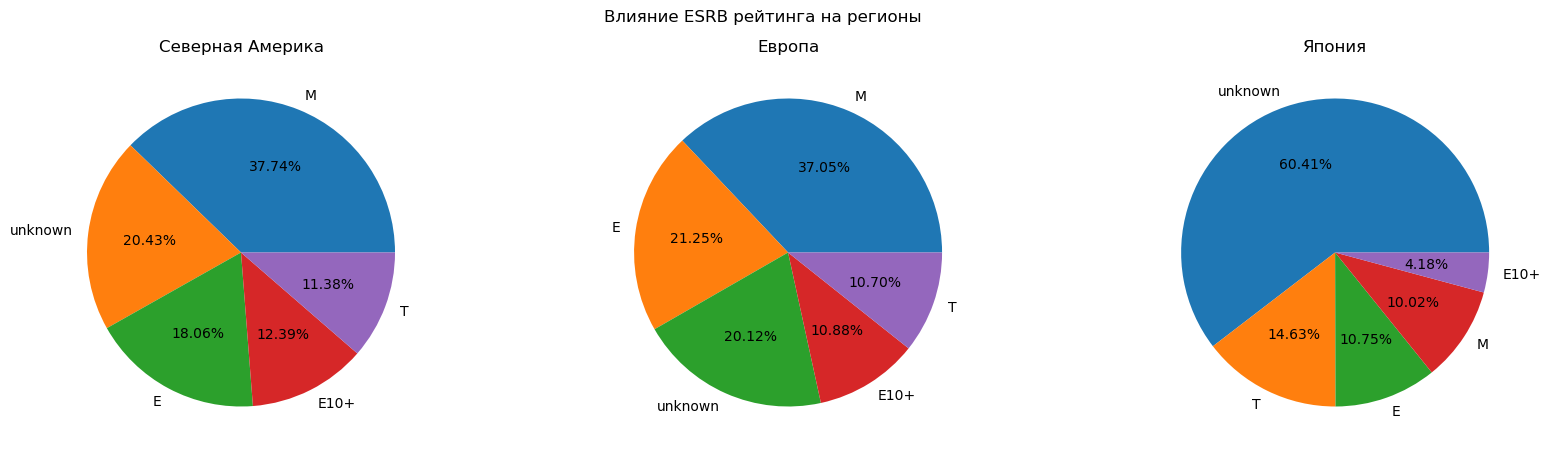

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

fig.suptitle('Влияние ESRB рейтинга на регионы')

ax[0].pie(na_rating['na_sales'], labels=na_rating['rating'],  autopct='%1.2f%%')
ax[0].set_title('Северная Америка')
ax[1].pie(eu_rating['eu_sales'], labels=eu_rating['rating'],  autopct='%1.2f%%')
ax[1].set_title('Европа')
ax[2].pie(jp_rating['jp_sales'], labels=jp_rating['rating'],  autopct='%1.2f%%')
ax[2].set_title('Япония')

plt.show()

Влияние на продажи оказывают ретйниги в Америке и Европе, в Японии используется другая система рейтингов, поэтому данные получились неоднозначные

<b>Вывод</b>  

В Северной Америке и Европе одинаковые картины с популярные платформами, жанрами и рейтингами, за исключением PS3 в Европе.
Напротив, в Японии совсем другие данные, самая популярнейшая консоль - 3DS от Nintendo. Жанры - Role-Playing и Action.  
Рейтинги влияют на продажи в Америке и Европе, из них популярны - М и Е. В Японии рейтинги ESRB не играют никакой роли, так как ESRB присваивает ретинги в Северной Америке и Канаде.

### Проверка гипотез

<b>Гипотеза 1</b>  

H_0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Н_1: средние пользовательские рейтинги платформ Xbox One и РС разные  

Создадим переменные с нужными данными и посчитаем средние пользовательские рейтинги по платформам.

In [37]:
xbox_one = current_period.query("platform == 'XOne'").dropna(subset = ['user_score']).reset_index(drop=True)
pc = current_period.query("platform == 'PC'").dropna(subset = ['user_score']).reset_index(drop=True)

xbox_one_list = xbox_one['user_score']
pc_list = pc['user_score']

print('Средний пользовательский рейтинг для XOne', round(xbox_one_list.mean(), 2))
print('Средний пользовательский рейтинг для РС', round(pc_list.mean(), 2))

Средний пользовательский рейтинг для XOne 6.52
Средний пользовательский рейтинг для РС 6.27


Выполним проверку гипотезы методом ttest_ind.

In [38]:
alpha = .05

results = st.ttest_ind(xbox_one_list, pc_list)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


<b>Гипотеза 2</b>  

Н_0: Средние пользовательские оценки жанров Action и Sports одинаковые.  
Н_1: Средние пользовательские оценки жанров Action и Sports не одинаковые.

In [39]:
action = current_period.query("genre == 'Action'").dropna(subset = ['user_score']).reset_index(drop=True)
sports = current_period.query("genre == 'Sports'").dropna(subset = ['user_score']).reset_index(drop=True)

action_list = action['user_score']
sports_list = sports['user_score']

print('Средний пользовательский рейтинг для жанра Action', round(action_list.mean(), 2))
print('Средний пользовательский рейтинг для жанра Sports', round(sports_list.mean(), 2))

Средний пользовательский рейтинг для жанра Action 6.84
Средний пользовательский рейтинг для жанра Sports 5.24


In [40]:
alpha = .05

results = st.ttest_ind(action_list, sports_list)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


<b>Вывод</b>  

В обоих случаях суть Н_0 была в равенстве двух параметров, а Н_1 - в различии.  
Для проверки гипотез был использован двухсторонний t-тест.  
В первом случае нулевая гипотеза подтвердилась, потому что р-значение было больше порогового значения alpha, а во втором случае наоборот, нулевая гипотеза была отвергнута из-за того, что р-значение было меньше порогового значения alpha.

### Общий вывод

В данном проекте были выявлены определяющие успешность игры закономерности.  
Сначала провели предобработку данных:  
- переименовали стобцы;  
- заполнили пропуски, которые возможно;  
- удалили не нужные данные;  
- добавили столбец с суммарными продажами.  
Всего удалили 271 строку - это 1,6% от общего количества.  
Далее провели исследовательский анализ.  
Посмотрели сколько игр выпускалось в разные года, выбрали платформы с наибольшими суммарными продажами, выяснили за какой срок платформы теряют свою актуальность. Выбрали актуальный период опираясь на жизненный цикл консоли, на основе которого можно построить прогноз на 2017 год. Выбрали потенциально прибыльные платформы которые лидируют по продажам. Проследили зависимость продаж от оценок критиков и пользователей. Выявили самые популярные жанры игр.  
Определили какие популярные платформы, жанры, рейтинги в разных регионах и проверили гипотезы, основывающиеся на средних пользовательских оценках, по платформам и жанрам.  

В итоге получилось, что 2008 и 2009 года были пиковыми для выпуска игр, после этого периода количсетво выпускаемых игр пошло на спад, вероятнее из-за того, то на смену однопользовательским играм пришли много пользовательские, которые поддерживаются выпускаемыми обновлениями от разработчиков и донатами, тем самым нет надобности выпускать кучу игр. Наиболее популярные платформы - PS4, X360, XOne. Продажи игра на платформы прямопропорционально зависят от оценок критиков и не зависят от оценок пользователей, так как пользователи оценивают игры более субъективно, чем критики. Самые популярные жанры - Action, Shooter, Sports, Role_playing. Большинство игр выпускаемых на популярные платформы именно такого жанра.  
В Северной Америке и Европе предпочтения игроков в выборе платформы, жанра и рейтинга игры совпадают, за исключением, что в Европе была очень популярна консоль PS3. В Японии совершенно другие приоритеты. На первом месте у них 3DS от компании Nintendo. Консоль портативная и на ней не особо разойдешься в разработке мощных игр, поэтому там на первых местах жанры Role-Playing и Action, хотя для этой платформы была разработана легендарная игра Super Mario Bros., у которой довольно хорошие продажи.  
ESRB рейтинги сильно влияют на продажи в Америке и Европе, так как ESRB ставит рейтинги в Северной Америке и Канаде. Из-за этого в Японии рейтинг ESRB никак не влияет.
Проверили гипотезы с помощию двухстороннего t-теста что, средние пользовательские рейтинги платформ XOne и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports одинаковые. В первом случае нулевую гипотезу не отвергли, во втором, наоборот, отвергли.  

Итак, на основе этого исследования можно спрогнозировать какие игры лучше выпускать для больших продаж в 2017 году. Это должны быть игры:  
- для Америки - игра на PS4 или XOne жанра Action, Shooter и рейтингом ESRB - M;  
- для Европы - игра на PS4 или XOne жанра Action, Shooter, Sports и рейтингм ESRB - М или Е;  
- для Японии - игра на 3DS жанра Role-Playing или Action, рейтинг ESRB не играет роли.